<a href="https://colab.research.google.com/github/AndreSD74/mbaUSP-DataScience-2021/blob/main/GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Montar o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/mbaUSP-DataScience-2021")  
!ls

data  GLM.ipynb  README.md  setup_colab.ipynb


### Instalando Bibliotecas

In [ ]:
!pip install pyreadr # para carregar arquivos .RData

     |████████████████████████████████| 409 kB 5.4 MB/s 


# Regressão Linear Múltipla

### Carregando dados de Países

In [ ]:
import pyreadr

result = pyreadr.read_r('data/paises.RData') 
print(result.keys()) 

odict_keys(['paises'])


In [ ]:
import pandas as pd

In [13]:
paises = result["paises"]
paises

,pais,cpi,idade,horas
rownames,,,,
1,Argentina,3.9,72,35.000000
2,Australia,8.7,64,32.000000
3,Austria,7.9,72,32.000000
4,Belgium,7.1,67,30.100000
5,Brazil,4.0,59,35.000000
6,Canada,8.9,61,33.400002
7,Chile,6.2,70,34.000000
8,China,2.5,49,34.000000
9,Colombia,4.0,79,33.000000


### Fazendo análise de correlação de Pearson

##### Algumas fontes públicas na Internet:
https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a


In [14]:
import seaborn as sn

In [17]:
correlation = paises.corr()

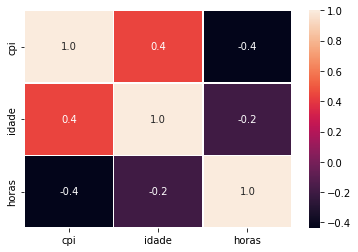

In [18]:
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

cpi possui correlação positiva (0.4) com idade, e correlação negativa (-0.4) com horas.
idade possui correlação negativa (-0.2) com horas

#### codificando a regressão linear múltipla

https://www.computersciencemaster.com.br/o-que-e-regressao-linear-multipla-e-como-usar/

https://nathaliatito.medium.com/scikit-learn-ou-statsmodels-avaliando-meu-modelo-de-regress%C3%A3o-f4c04b361fa7

In [38]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score

In [22]:
X = paises[['idade','horas']]
y = paises['cpi']

In [24]:
regr_multi = linear_model.LinearRegression()
regr_multi.fit(X, y)

paises['cpi-predict'] = regr_multi.predict(X)

In [35]:
# imprimindo os coeficientes beta e o interceptor alpha
list(zip(X.columns, np.around(regr_multi.coef_, 4)))

[('idade', 0.0997), ('horas', -0.4013)]

In [36]:
print('intercept alpha: ', np.round(regr_multi.intercept_, 4))

intercept alpha:  11.9719


In [40]:
# calculando residuo e o R2 (coeficiente de determinação)

residuo = paises['cpi'] - paises['cpi-predict']

r2 = r2_score(paises['cpi'], paises['cpi-predict'])

print(r2)

0.32387117836812684
